In [1]:
'''We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1.fitting it to the periodic function
2.plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18'''

import numpy as np
import matplotlib.pyplot as plt
temp_Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
temp_Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

months = np.arange(1,13,1)
plt.plot(months, temp_Max, 'ro')
plt.plot(months, temp_Min, 'bo')


In [2]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_Max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_Min, [-40, 20, 0])

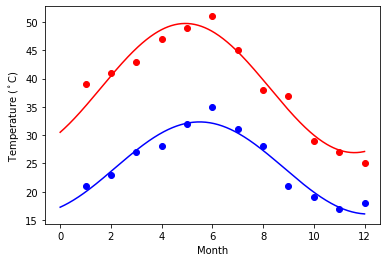

In [3]:
days = np.linspace(0, 12, num=365)
plt.figure()
plt.plot(months, temp_Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

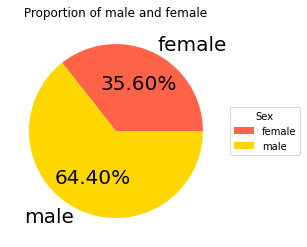

In [5]:
'''This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion'''

import pandas as pd
import matplotlib.pyplot as plt

titanic = pd.read_csv(r'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
df = pd.DataFrame(titanic)
fig1, ax1 = plt.subplots()
df.groupby('sex').size().plot(kind='pie', autopct='%0.2f%%', textprops={'fontsize': 20},
                                  colors=['tomato', 'gold'], ax=ax1)

ax1.set_title('Proportion of male and female')
ax1.set_ylabel('')
ax1.legend(title="Sex", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

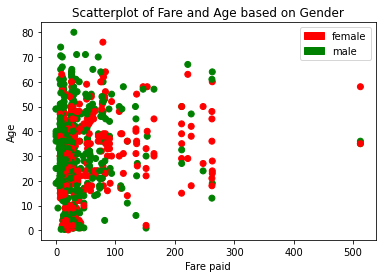

In [23]:
'''2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender'''

import matplotlib.patches as mpatches

x = df['fare']
y = df['age']
z = df['sex']
fig, ax = plt.subplots()
colors = {'female':'red', 'male':'green'}
col_convert = np.vectorize(lambda x: 'yellow' if pd.isnull(x) else colors[x])
sc = ax.scatter(df['fare'], df['age'], c=col_convert(df['sex']))

ax.set_xlabel('Fare paid')
ax.set_ylabel('Age')
ax.set_title('Scatterplot of Fare and Age based on Gender')

dic = { 'female' : 'red', 'male' : 'green'}
patchList = []
for key in dic:
        data_key = mpatches.Patch(color=dic[key], label=key)
        patchList.append(data_key)

plt.legend(handles=patchList)
plt.show()

In [80]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [104]:
type(colors)

dict

In [105]:
len(df)

1310

In [109]:
df.iloc[1308, 3]

'male'